In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import os.path
from pathlib import Path

In [2]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 6
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.25
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.pad'] = 2

plt.rcParams['ytick.major.width'] = 0.25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.major.pad'] = 2

plt.rcParams['axes.labelpad'] = 2

### DMS plots
Figure 1 Panels D & E

In [3]:
fileIn = pd.read_excel('../data/Fig1/DMS_inputs.xlsx')
ftype = '_z_score_'

In [4]:
sings = pd.DataFrame()
trips = pd.DataFrame()
decs = pd.DataFrame()

peaks = pd.DataFrame()
for a,b in fileIn.iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    for c in ['right', 'left']: 
        df = pd.DataFrame()
        if b['protocol'] == 'opto':
            s1 = pd.read_hdf(Path(path+'/single_'+c+ftype+c+'.h5'))
            s3 = pd.read_hdf(Path(path+'/three_'+c+ftype+c+'.h5'))
            s10 = pd.read_hdf(Path(path+'/ten_'+c+ftype+c+'.h5'))
            
            sings = pd.concat([sings, s1['mean']], axis = 1, ignore_index = True)
            trips = pd.concat([trips, s3['mean']], axis = 1, ignore_index = True)
            decs = pd.concat([decs, s10['mean']], axis = 1, ignore_index = True)
            
            new_row = pd.DataFrame({'sings':s1['mean'].max(), 'trips':s3['mean'].max(), 'decs':s10['mean'].max(), 'mouse':b['mouse'], 'date':b['date'], 'hemi':c}, index=[0])
            peaks = pd.concat([new_row,peaks.loc[:]]).reset_index(drop=True)


sings['timestamps'] = s1['timestamps']
trips['timestamps'] = s3['timestamps']
decs['timestamps'] = s10['timestamps']

sings_melt = pd.melt(sings, id_vars=['timestamps'])  
trips_melt = pd.melt(trips, id_vars=['timestamps'])  
decs_melt = pd.melt(decs, id_vars=['timestamps'])  

sings['average'] = sings.iloc[:,0:-1].mean(axis=1)
trips['average'] = trips.iloc[:,0:-1].mean(axis=1)
decs['average'] = decs.iloc[:,0:-1].mean(axis=1)

In [5]:
peaks['ID'] = peaks['mouse']+'_'+peaks['hemi']
temp = peaks.groupby('ID').mean(numeric_only = True)
temp = pd.melt(temp)
temp = temp[temp['variable'] != 'date']

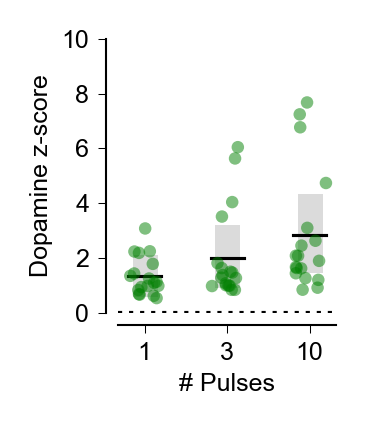

In [6]:
fix, ax = plt.subplots(figsize = (1.2,1.4), dpi = 300)
m1 = temp[temp['variable'] == 'sings']['value'].mean()
m3 = temp[temp['variable'] == 'trips']['value'].mean()
m10 = temp[temp['variable'] == 'decs']['value'].mean()
sns.pointplot(temp, x = 'variable', y = 'value', hue = 'variable', legend = False, errorbar = ('ci', 95), palette = ['0.3', '0.3', '0.3'], alpha = 0.2, linewidth = 6, markersize =0)
sns.stripplot(temp, x = 'variable', y = 'value', hue = 'variable', legend = False, palette = ['Green', 'Green', 'Green'], size = 3, jitter = 0.2, alpha = 0.5)
#sns.scatterplot(temp, x = 'variable', y = 'value', hue = 'variable', legend = False)
plt.plot([-0.2,0.2],[m1,m1], color = 'k', lw = 0.75)
plt.plot([0.8,1.2],[m3,m3], color = 'k', lw = 0.75)
plt.plot([1.8,2.2],[m10,m10], color = 'k', lw = 0.75)

plt.xticks([0,1,2], ['1', '3', '10'], fontsize = 6)
plt.yticks([0, 2, 4, 6, 8, 10], [0, 2, 4, 6, 8, 10], fontsize = 6)
plt.xlabel('# Pulses', fontsize = 6)
#plt.ylabel('dF/F (%)')
plt.ylabel(r'Dopamine z-score', fontsize = 6)
plt.axhline(0, ls = ":", color = 'k', lw = 1)

sns.despine(offset = 3)
plt.tight_layout()
plt.savefig('../figOutputs/fig1_dms_pop.pdf', dpi = 300, bbox_inches = 'tight')

In [7]:
print('1p:', temp[temp['variable'] == 'sings']['value'].mean(), temp[temp['variable'] == 'sings']['value'].sem())
print('3p:', temp[temp['variable'] == 'trips']['value'].mean(), temp[temp['variable'] == 'trips']['value'].sem())
print('10p:', temp[temp['variable'] == 'decs']['value'].mean(), temp[temp['variable'] == 'decs']['value'].sem())

1p: 1.3267198359524763 0.16603565395939165
3p: 2.008796979983648 0.38745850822874905
10p: 2.8425241245163813 0.5224895281145443


In [8]:
print('1p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'sings']['value'])))
print('3p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'trips']['value'])))
print('10p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'decs']['value'])))

1p 95% CI: [1.02703543 1.65759659]
3p 95% CI: [1.34760819 2.82059993]
10p 95% CI: [1.93290459 3.88797688]


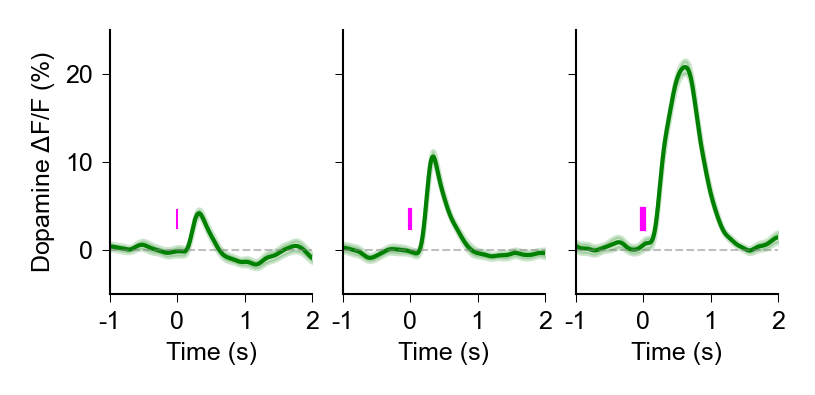

In [9]:
sings = pd.DataFrame()
trips = pd.DataFrame()
decs = pd.DataFrame()
for a,b in fileIn[fileIn['mouse'] == 'Ch-20'].iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    if b['protocol'] == 'opto':
        s1 = pd.read_hdf(Path(path+'/single_right_dff_right.h5')).iloc[:,0:-2]
        s3 = pd.read_hdf(Path(path+'/three_right_dff_right.h5')).iloc[:,0:-2]
        s10 = pd.read_hdf(Path(path+'/ten_right_dff_right.h5')).iloc[:,0:-2]

        sings = pd.concat([sings, s1], ignore_index = True)
        trips = pd.concat([trips, s3], ignore_index = True)
        decs = pd.concat([decs, s10], ignore_index = True)

sings = pd.melt(sings, id_vars=['timestamps'])  
trips = pd.melt(trips, id_vars=['timestamps'])  
decs = pd.melt(decs, id_vars=['timestamps'])


fig, ax = plt.subplots(1,3, figsize = (2.6,1.2), sharey = True, dpi = 300)
sns.lineplot(sings, ax = ax[0], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[0].set_xlim(-1,2)
ax[0].set_ylabel(r'Dopamine $\Delta$F/F (%)', fontsize = 6)
ax[0].set_xlabel('Time (s)', fontsize = 6)
ax[0].set_ylim(-5, 25)
ax[0].set_yticks([0,10,20])
ax[0].set_yticklabels([0,10,20], fontsize = 6)
ax[0].set_xticks([-1, 0,1,2])
ax[0].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[0].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

sns.lineplot(trips, ax = ax[1], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[1].set_xlim(-1,2)
ax[1].set_xlabel('Time (s)', fontsize = 6)
ax[1].set_xticks([-1, 0,1,2])
ax[1].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[1].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

sns.lineplot(decs, ax = ax[2], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[2].set_xlim(-1,2)
ax[2].set_xlabel('Time (s)', fontsize = 6)
ax[2].set_xticks([-1, 0,1,2])
ax[2].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[2].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

ax[0].plot([0,0], [2.5,4.5], lw = 0.5, color = 'magenta')
ax[1].plot([0,0], [2.5,4.5], lw = 1, color = 'magenta')
ax[2].plot([0,0], [2.5,4.5], lw = 1.5, color = 'magenta')

sns.despine()
plt.tight_layout(pad = 0.5)
plt.savefig('../figOutputs/fig1_DMS_traces.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [10]:
sTime = sings.groupby('timestamps').mean('value').idxmax()
tTime = trips.groupby('timestamps').mean('value').idxmax()
dTime = decs.groupby('timestamps').mean('value').idxmax()

sMax = sings.groupby('timestamps').mean('value').max()
tMax = trips.groupby('timestamps').mean('value').max()
dMax = decs.groupby('timestamps').mean('value').max()


sSEM = sings[(sings['timestamps'] > sTime[0]-0.1)&(sings['timestamps'] < sTime[0]+0.1)]['value'].sem()
tSEM = trips[(trips['timestamps'] > tTime[0]-0.1)&(trips['timestamps'] < tTime[0]+0.1)]['value'].sem()
dSEM = decs[(decs['timestamps'] > dTime[0]-0.1)&(decs['timestamps'] < dTime[0]+0.1)]['value'].sem()

In [11]:
print('1p:', sMax[0], ' +/- ' , sSEM , ' @ ', sTime[0])

print('3p:', tMax[0], ' +/- ' , tSEM , ' @ ', tTime[0])

print('10p:', dMax[0], ' +/- ' , dSEM , ' @ ', dTime[0])

1p: 4.177827  +/-  0.033278346  @  0.32098958
3p: 10.624064  +/-  0.04825239  @  0.3377027
10p: 20.78638  +/-  0.054416936  @  0.6208421


### DLS plots
Figure 1 Panels I & J

In [12]:
fileIn = pd.read_excel('../data/Fig1/DLS_inputs.xlsx')
ftype = '_z_score_'

In [13]:
sings = pd.DataFrame()
trips = pd.DataFrame()
decs = pd.DataFrame()

peaks = pd.DataFrame()
for a,b in fileIn.iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    for c in ['right', 'left']: 
        df = pd.DataFrame()
        if b['protocol'] == 'opto':
            s1 = pd.read_hdf(Path(path+'/single_'+c+ftype+c+'.h5'))
            s3 = pd.read_hdf(Path(path+'/three_'+c+ftype+c+'.h5'))
            s10 = pd.read_hdf(Path(path+'/ten_'+c+ftype+c+'.h5'))
            
            sings = pd.concat([sings, s1['mean']], axis = 1, ignore_index = True)
            trips = pd.concat([trips, s3['mean']], axis = 1, ignore_index = True)
            decs = pd.concat([decs, s10['mean']], axis = 1, ignore_index = True)
            
            new_row = pd.DataFrame({'sings':s1[(s1['timestamps'] < 1)&(s1['timestamps'] > 0)]['mean'].min(), 'trips':s3[(s3['timestamps'] < 1)&(s3['timestamps'] > 0)]['mean'].min(), 'decs':s10[(s10['timestamps'] < 1)&(s10['timestamps'] > 0)]['mean'].min(), 'mouse':b['mouse'], 'date':b['date'], 'hemi':c}, index=[0])
            peaks = pd.concat([new_row,peaks.loc[:]]).reset_index(drop=True)
            

sings['timestamps'] = s1['timestamps']
trips['timestamps'] = s3['timestamps']
decs['timestamps'] = s10['timestamps']

sings_melt = pd.melt(sings, id_vars=['timestamps'])  
trips_melt = pd.melt(trips, id_vars=['timestamps'])  
decs_melt = pd.melt(decs, id_vars=['timestamps'])  

sings['average'] = sings.iloc[:,0:-1].mean(axis=1)
trips['average'] = trips.iloc[:,0:-1].mean(axis=1)
decs['average'] = decs.iloc[:,0:-1].mean(axis=1)

In [14]:
peaks['ID'] = peaks['mouse']+'_'+peaks['hemi']
temp = peaks.groupby('ID').mean(numeric_only = True)
temp = pd.melt(temp)
temp = temp[temp['variable'] != 'date']

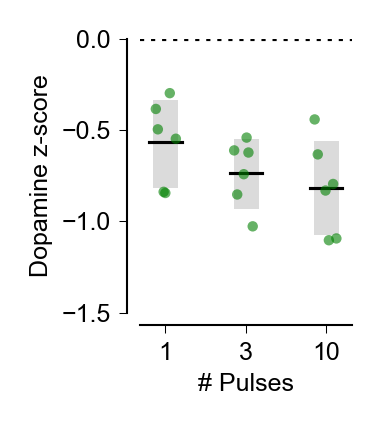

In [15]:
fix, ax = plt.subplots(figsize = (1.3,1.4), dpi = 300)
m1 = temp[temp['variable'] == 'sings']['value'].mean()
m3 = temp[temp['variable'] == 'trips']['value'].mean()
m10 = temp[temp['variable'] == 'decs']['value'].mean()
sns.pointplot(temp, x = 'variable', y = 'value', hue = 'variable', legend = False, errorbar = ('ci', 95), palette = ['0.3', '0.3', '0.3'], alpha = 0.2, linewidth = 6, markersize =0)
sns.stripplot(temp, x = 'variable', y = 'value', hue = 'variable', legend = False, palette = ['Green', 'Green', 'Green'], size = 2.5, jitter = 0.15, alpha = 0.6)
plt.plot([-0.2,0.2],[m1,m1], color = 'k', lw = 0.75)
plt.plot([0.8,1.2],[m3,m3], color = 'k', lw = 0.75)
plt.plot([1.8,2.2],[m10,m10], color = 'k', lw = 0.75)

plt.xticks([0,1,2], ['1', '3', '10'], fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('# Pulses', fontsize = 6)
#plt.ylabel('dF/F (%)')
plt.ylabel(r'Dopamine z-score', fontsize = 6)
plt.ylim(-1.5, 0)
plt.axhline(0, ls = ":", color = 'k', lw = 1)

sns.despine(offset = 3)
plt.tight_layout()
plt.savefig('../figOutputs/fig1_dls_pop.pdf', dpi = 300, bbox_inches = 'tight')

In [16]:
print('1p mean:', temp[temp['variable'] == 'sings']['value'].mean())
print('3p mean:', temp[temp['variable'] == 'trips']['value'].mean())
print('10p mean:', temp[temp['variable'] == 'decs']['value'].mean())

1p mean: -0.5676284043325318
3p mean: -0.7326394518216451
10p mean: -0.8162717090712653


In [17]:
print('1p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'sings']['value'])))
print('3p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'trips']['value'])))
print('10p 95% CI:', sns.utils.ci(sns.algorithms.bootstrap(temp[temp['variable'] == 'decs']['value'])))

1p 95% CI: [-0.73463194 -0.40640799]
3p 95% CI: [-0.87260792 -0.611214  ]
10p 95% CI: [-1.00352401 -0.62901941]


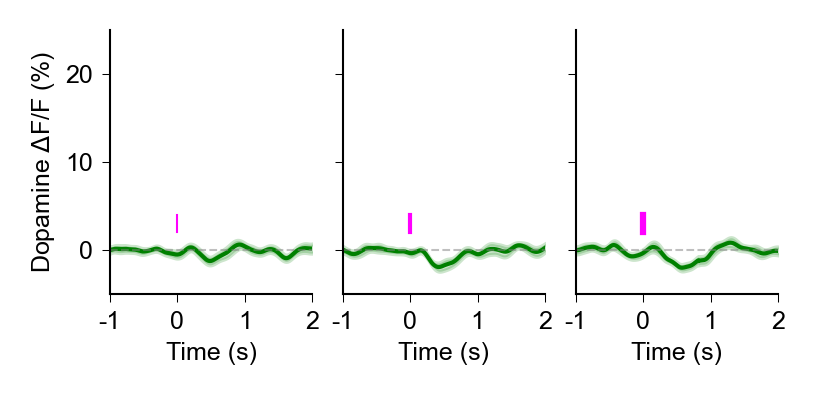

In [18]:
sings = pd.DataFrame()
trips = pd.DataFrame()
decs = pd.DataFrame()
for a,b in fileIn[fileIn['mouse'] == 'Ch-26'].iterrows():
    file = b['mouse']+'-' +str(b['date'])+'-'+str(b['time'])
    output = file + '_' + (b['output'])
    path = ('../data/Fig1/photometryTraces/'+ output)
    if b['protocol'] == 'opto':
        s1 = pd.read_hdf(Path(path+'/single_right_dff_right.h5')).iloc[:,0:-2]
        s3 = pd.read_hdf(Path(path+'/three_right_dff_right.h5')).iloc[:,0:-2]
        s10 = pd.read_hdf(Path(path+'/ten_right_dff_right.h5')).iloc[:,0:-2]

        sings = pd.concat([sings, s1], ignore_index = True)
        trips = pd.concat([trips, s3], ignore_index = True)
        decs = pd.concat([decs, s10], ignore_index = True)

sings = pd.melt(sings, id_vars=['timestamps'])  
trips = pd.melt(trips, id_vars=['timestamps'])  
decs = pd.melt(decs, id_vars=['timestamps'])

fig, ax = plt.subplots(1,3, figsize = (2.6,1.2), sharey = True, dpi = 300)
sns.lineplot(sings, ax = ax[0], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[0].set_xlim(-1,2)
ax[0].set_ylabel(r'Dopamine $\Delta$F/F (%)', fontsize = 6)
ax[0].set_xlabel('Time (s)', fontsize = 6)
ax[0].set_ylim(-5, 25)
ax[0].set_yticks([0,10,20])
ax[0].set_yticklabels([0,10,20], fontsize = 6)
ax[0].set_xticks([-1, 0,1,2])
ax[0].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[0].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

sns.lineplot(trips, ax = ax[1], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[1].set_xlim(-1,2)
ax[1].set_xlabel('Time (s)', fontsize = 6)
ax[1].set_xticks([-1, 0,1,2])
ax[1].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[1].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

sns.lineplot(decs, ax = ax[2], x = 'timestamps', y = 'value', errorbar = ('se'), n_boot = 100, color = 'green', linewidth = 1)
ax[2].set_xlim(-1,2)
ax[2].set_xlabel('Time (s)', fontsize = 6)
ax[2].set_xticks([-1, 0,1,2])
ax[2].set_xticklabels([-1, 0,1,2], fontsize = 6)
ax[2].axhline(0, ls = '--', color = '0.5', alpha = 0.5, lw = 0.5)

ax[0].plot([0,0], [2,4], lw = 0.5, color = 'magenta')
ax[1].plot([0,0], [2,4], lw = 1, color = 'magenta')
ax[2].plot([0,0], [2,4], lw = 1.5, color = 'magenta')

sns.despine()
plt.tight_layout(pad = 0.5)
plt.savefig('../figOutputs/fig1_DLS_traces.pdf', dpi = 300, bbox_inches = 'tight')

In [19]:
sTime = sings.groupby('timestamps').mean('value').idxmin()
tTime = trips.groupby('timestamps').mean('value').idxmin()
dTime = decs.groupby('timestamps').mean('value').idxmin()

sMax = sings.groupby('timestamps').mean('value').min()
tMax = trips.groupby('timestamps').mean('value').min()
dMax = decs.groupby('timestamps').mean('value').min()


sSEM = sings[(sings['timestamps'] > sTime[0]-0.1)&(sings['timestamps'] < sTime[0]+0.1)]['value'].sem()
tSEM = trips[(trips['timestamps'] > tTime[0]-0.1)&(trips['timestamps'] < tTime[0]+0.1)]['value'].sem()
dSEM = decs[(decs['timestamps'] > dTime[0]-0.1)&(decs['timestamps'] < dTime[0]+0.1)]['value'].sem()

In [20]:
sSEM = sings[(sings['timestamps'] > sTime[0]-0.1)&(sings['timestamps'] < sTime[0]+0.1)]['value'].sem()
tSEM = trips[(trips['timestamps'] > tTime[0]-0.1)&(trips['timestamps'] < tTime[0]+0.1)]['value'].sem()
dSEM = decs[(decs['timestamps'] > dTime[0]-0.1)&(decs['timestamps'] < dTime[0]+0.1)]['value'].sem()

In [21]:
print('1p:', sMax[0], ' +/- ' , sSEM , ' @ ', sTime[0])

print('3p:', tMax[0], ' +/- ' , tSEM , ' @ ', tTime[0])

print('10p:', dMax[0], ' +/- ' , dSEM , ' @ ', dTime[0])

1p: -1.2544165  +/-  0.030130962  @  0.48615426
3p: -1.9343586  +/-  0.031114431  @  0.42323437
10p: -2.0136223  +/-  0.024489244  @  0.57660156
